# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 591


In [5]:
url= f"https://api.openweathermap.org/data/2.5/weather?units=metric&q={city}&appid={weather_api_key}"
response = requests.get(url).json()
response2 = json.dumps(response, indent=4)
print(response2)

{
    "coord": {
        "lon": -73.9662,
        "lat": 42.6001
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 12.02,
        "feels_like": 10.35,
        "temp_min": 10.87,
        "temp_max": 13.13,
        "pressure": 1014,
        "humidity": 41
    },
    "visibility": 10000,
    "wind": {
        "speed": 0.45,
        "deg": 119,
        "gust": 1.79
    },
    "clouds": {
        "all": 100
    },
    "dt": 1683641713,
    "sys": {
        "type": 2,
        "id": 19530,
        "country": "US",
        "sunrise": 1683625241,
        "sunset": 1683677039
    },
    "timezone": -14400,
    "id": 5106841,
    "name": "Albany",
    "cod": 200
}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url).json()
    try:

        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort st. john
Processing Record 2 of Set 1 | san antonio del estrecho
City not found. Skipping...
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | pullman
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | gizo
Processing Record 12 of Set 1 | chatellerault
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | lethem
Processing Record 15 of Set 1 | paita
Processing Record 16 of Set 1 | broome
Processing Record 17 of Set 1 | toliara
Processing Record 18 of Set 1 | gadzhiyevo
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | aswan
Processing Record 21 of Set 1 | cabo san lucas
Processing 

Processing Record 38 of Set 4 | qaqortoq
Processing Record 39 of Set 4 | lihue
Processing Record 40 of Set 4 | nar'yan-mar
Processing Record 41 of Set 4 | jutai
Processing Record 42 of Set 4 | tak bai
Processing Record 43 of Set 4 | oyem
Processing Record 44 of Set 4 | zouerate
Processing Record 45 of Set 4 | usinsk
Processing Record 46 of Set 4 | whitehorse
Processing Record 47 of Set 4 | shendi
Processing Record 48 of Set 4 | mandalgovi
Processing Record 49 of Set 4 | mount gambier
Processing Record 0 of Set 5 | labrador city
Processing Record 1 of Set 5 | kulachi
Processing Record 2 of Set 5 | guerrero negro
Processing Record 3 of Set 5 | korla
Processing Record 4 of Set 5 | nagqu
Processing Record 5 of Set 5 | cidreira
Processing Record 6 of Set 5 | padang
Processing Record 7 of Set 5 | birjand
Processing Record 8 of Set 5 | benguela
Processing Record 9 of Set 5 | nizhnesortymskiy
Processing Record 10 of Set 5 | thompson
Processing Record 11 of Set 5 | dahab
Processing Record 12 of

Processing Record 30 of Set 8 | uglegorsk
Processing Record 31 of Set 8 | port lincoln
Processing Record 32 of Set 8 | ugoofaaru
Processing Record 33 of Set 8 | kolwezi
Processing Record 34 of Set 8 | thirsk
Processing Record 35 of Set 8 | cessnock
Processing Record 36 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 37 of Set 8 | cannonvale
Processing Record 38 of Set 8 | patnanungan
Processing Record 39 of Set 8 | lembar
City not found. Skipping...
Processing Record 40 of Set 8 | aywaille
Processing Record 41 of Set 8 | ubari
Processing Record 42 of Set 8 | manta
Processing Record 43 of Set 8 | barra de santo antonio
Processing Record 44 of Set 8 | alotau
City not found. Skipping...
Processing Record 45 of Set 8 | pandan
Processing Record 46 of Set 8 | happy valley-goose bay
Processing Record 47 of Set 8 | codrington
Processing Record 48 of Set 8 | tabora
Processing Record 49 of Set 8 | ayapel
Processing Record 0 of Set 9 | natal
Processing Record 1 of Set 9 | gene

Processing Record 17 of Set 12 | isla mujeres
Processing Record 18 of Set 12 | vuktyl
Processing Record 19 of Set 12 | formosa
Processing Record 20 of Set 12 | timbuktu
Processing Record 21 of Set 12 | iwatsuki
Processing Record 22 of Set 12 | thayetmyo
Processing Record 23 of Set 12 | kiwira
Processing Record 24 of Set 12 | ambon
Processing Record 25 of Set 12 | al khafji
Processing Record 26 of Set 12 | salalah
Processing Record 27 of Set 12 | misliyah
Processing Record 28 of Set 12 | klaksvik
Processing Record 29 of Set 12 | qulsary
Processing Record 30 of Set 12 | merizo village
Processing Record 31 of Set 12 | nadi
Processing Record 32 of Set 12 | sukagawa
Processing Record 33 of Set 12 | gaalkacyo
Processing Record 34 of Set 12 | irymple
Processing Record 35 of Set 12 | guymon
Processing Record 36 of Set 12 | kulia village
City not found. Skipping...
Processing Record 37 of Set 12 | bei'an
Processing Record 38 of Set 12 | arcen
Processing Record 39 of Set 12 | raja
Processing Rec

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort st. john,56.2499,-120.8529,8.94,71,100,3.60,CA,1683563363
1,port-aux-francais,-49.3500,70.2167,4.76,82,100,12.83,TF,1683563364
2,blackmans bay,-43.0167,147.3167,9.85,74,100,5.43,AU,1683563364
3,port elizabeth,-33.9180,25.5701,19.62,91,0,3.60,ZA,1683563365
4,puerto natales,-51.7236,-72.4875,5.25,75,75,2.06,CL,1683563094


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort st. john,56.2499,-120.8529,8.94,71,100,3.60,CA,1683563363
1,port-aux-francais,-49.3500,70.2167,4.76,82,100,12.83,TF,1683563364
2,blackmans bay,-43.0167,147.3167,9.85,74,100,5.43,AU,1683563364
3,port elizabeth,-33.9180,25.5701,19.62,91,0,3.60,ZA,1683563365
4,puerto natales,-51.7236,-72.4875,5.25,75,75,2.06,CL,1683563094


In [9]:
city_data_df['Max Temp']

City_ID
0       8.94
1       4.76
2       9.85
3      19.62
4       5.25
       ...  
570    23.64
571    20.33
572    15.20
573    14.65
574    17.45
Name: Max Temp, Length: 575, dtype: float64

In [10]:
len(city_data_df['Max Temp'])


575

In [11]:
len(city_data_df['Lat'])
type(city_data_df['Lat'][1])

numpy.float64

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

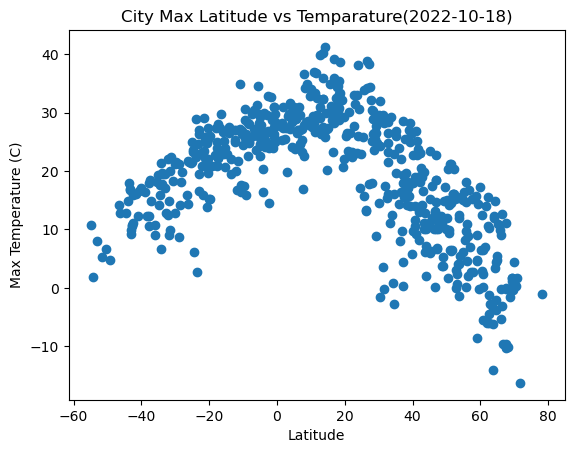

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temparature(2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

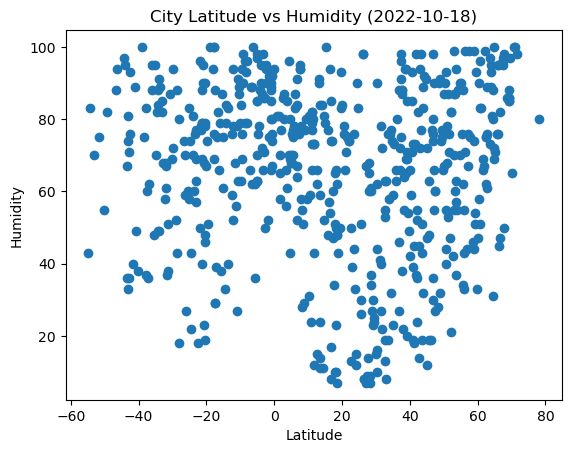

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity (2022-10-18)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

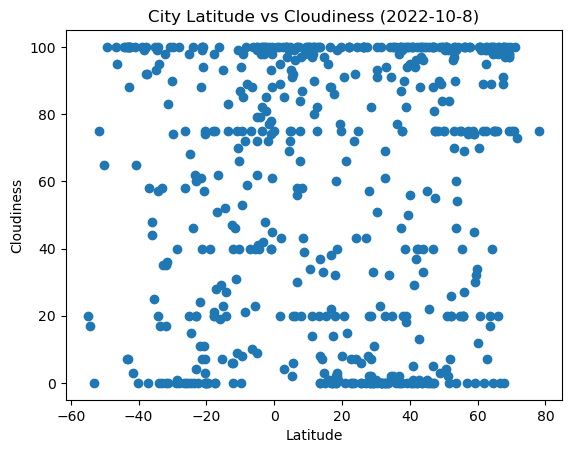

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness (2022-10-8)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

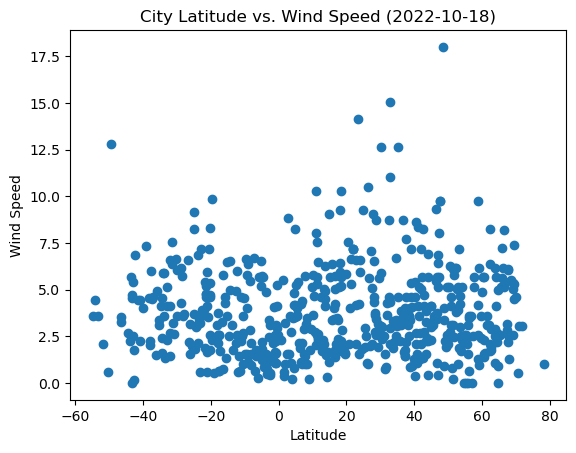

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, intercept, r_value, p_value, std_err

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_data_df['Lat'] = pd.to_numeric(city_data_df['Lat'],errors="coerce")
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort st. john,56.2499,-120.8529,8.94,71,100,3.60,CA,1683563363
6,pullman,46.7313,-117.1796,13.17,74,0,5.66,US,1683563366
8,yellowknife,62.4560,-114.3525,10.29,62,75,2.06,CA,1683563282
10,chatellerault,46.8000,0.5333,18.40,80,100,3.76,FR,1683563367
11,iqaluit,63.7506,-68.5145,-6.15,73,20,6.17,CA,1683563368


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.76,82,100,12.83,TF,1683563364
2,blackmans bay,-43.0167,147.3167,9.85,74,100,5.43,AU,1683563364
3,port elizabeth,-33.9180,25.5701,19.62,91,0,3.60,ZA,1683563365
4,puerto natales,-51.7236,-72.4875,5.25,75,75,2.06,CL,1683563094
5,east london,-33.0153,27.9116,19.52,82,0,5.14,ZA,1683563365


In [20]:
#print(linregress_north_hemi)
#print(linregress_south_hemi)

###  Temperature vs. Latitude Linear Regression Plot

 r = -0.8153499103880708


Text(5, -10, 'y = -0.49x + 35.61')

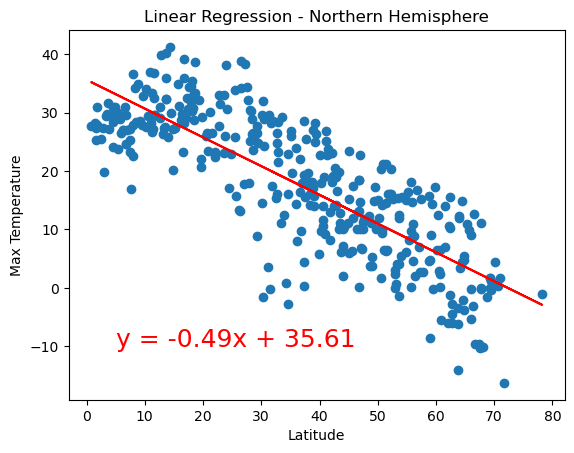

In [21]:
# Linear regression on Northern Hemisphere
linregress_north_hemi = linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], linregress_north_hemi[0]*northern_hemi_df['Lat'] + linregress_north_hemi[1], color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression - Northern Hemisphere')


print(f"The r-value is: r = {linregress_north_hemi[2]}")
equation = f'y = {linregress_north_hemi[0]:.2f}x + {linregress_north_hemi[1]:.2f}'
plt.text(5, -10, equation, fontsize=18, color = 'red')




 r = 0.7572512003680116


Text(-55, 28, 'y = 0.36x + 28.56')

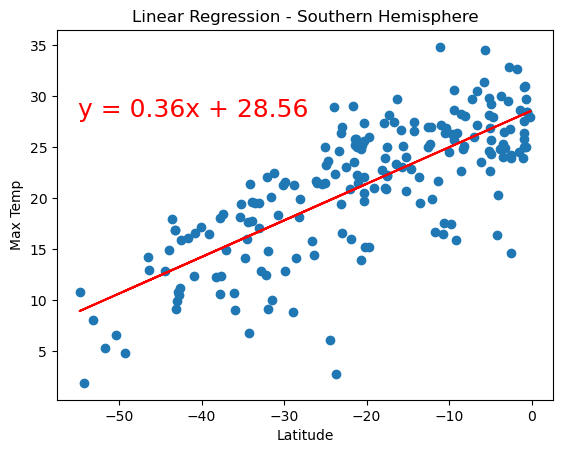

In [22]:
# Linear regression on Southern Hemisphere
linregress_south_hemi = linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], linregress_south_hemi[0]*southern_hemi_df['Lat'] + linregress_south_hemi[1], color='red', label='Linear Regression')


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression - Southern Hemisphere')

print(f"The r-value is: r = {linregress_south_hemi[2]}")
equation2 = f'y = {linregress_south_hemi[0]:.2f}x + {linregress_south_hemi[1]:.2f}'
plt.text(-55, 28, equation2, fontsize=18, color = 'red')


In [23]:
print(linregress_north_hemi)
print(linregress_south_hemi)
#slope, intercept, r_value, p_value, std_err

(-0.49230908704152576, 35.60998684215318, -0.8153499103880708, 1.669060709884616e-91, 0.018004376434939278)
(0.35871738475195203, 28.555680086197167, 0.7572512003680116, 9.676706850476067e-38, 0.022212991945456804)


**Discussion about the linear relationship:** 

There is a clear pattern observed in temperature changes with latitude. As you move towards the equator(latitude of zero), both in the Southern and Northern Hemispheres. There is a strong correlation between increasing temperatures and latitude. In the Southern Hemisphere, as latitude increases towards zero, max temperatures also increase (r = 0.82 rounded). Conversely, in the Northern Hemisphere, as latitude decreases towards zero, temperatures decrease (r = -0.83 rounded). These correlations indicate that as you approach the latitude of zero, max temperatures tend to reach higher values.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: r = 0.18640859884221922


Text(40, 8, 'y = 0.24x + 54.21')

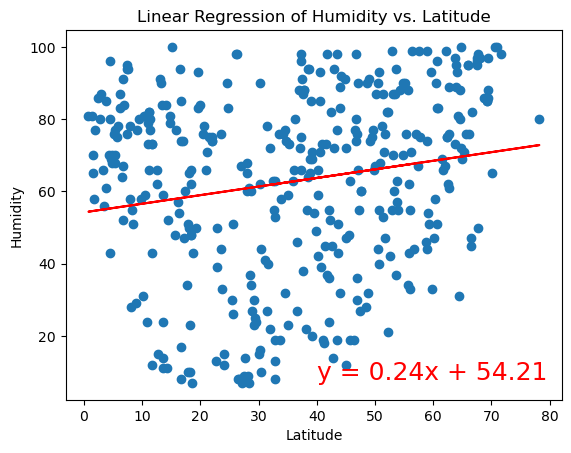

In [38]:
# Northern Hemisphere
hum_lat_north_hemi_regress = linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],hum_lat_north_hemi_regress[0]*northern_hemi_df['Lat'] + hum_lat_north_hemi_regress[1], color='red', label='Linear Regression')

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Linear Regression of Humidity vs. Latitude")

print(f"The r-value is: r = {hum_lat_north_hemi_regress[2]}")
equation3 = f'y = {hum_lat_north_hemi_regress[0]:.2f}x + {hum_lat_north_hemi_regress[1]:.2f}'
plt.text(40,8, equation3, fontsize=18, color = 'red')



 r = 0.20946830285354393


Text(-50, 28, 'y = 0.30x + 77.61')

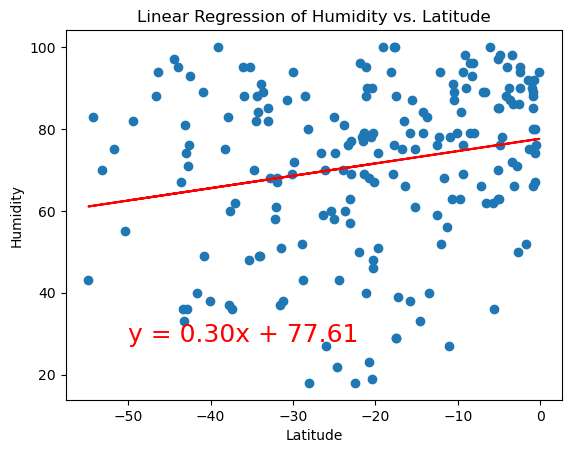

In [25]:
# Southern Hemisphere
hum_lat_south_hemi_regress = linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],hum_lat_south_hemi_regress[0]*southern_hemi_df['Lat'] + hum_lat_south_hemi_regress[1], color='red', label='Linear Regression')

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Linear Regression of Humidity vs. Latitude")

print(f"The r-value is: r = {hum_lat_south_hemi_regress[2]}")
equation4 = f'y = {hum_lat_south_hemi_regress[0]:.2f}x + {hum_lat_south_hemi_regress[1]:.2f}'
plt.text(-50, 28, equation4, fontsize=18, color = 'red')



**Discussion about the linear relationship:** 

Weak to no correlation appearant between humidity and latitude. The r-squared values for both, between northern hemisphere and latitude and southern hemisphere and latitude, are 0.20 and 0.07 respectively. 


### Cloudiness vs. Latitude Linear Regression Plot

 r = 0.0946660364536324


Text(45, 28, 'y = 0.19x + 50.74')

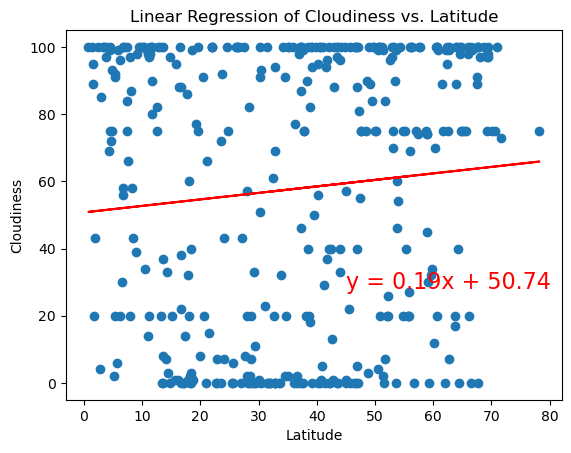

In [29]:
# Northern Hemisphere
cloud_lat_north_hemi_regress = linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],cloud_lat_north_hemi_regress[0]*northern_hemi_df['Lat'] + cloud_lat_north_hemi_regress[1], color='red', label='Linear Regression')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear Regression of Cloudiness vs. Latitude")

print(f"The r-value is: r = {cloud_lat_north_hemi_regress[2]}")
equation5 = f'y = {cloud_lat_north_hemi_regress[0]:.2f}x + {cloud_lat_north_hemi_regress[1]:.2f}'
plt.text(45, 28, equation5, fontsize=16, color = 'red')

 r = 0.07866357894001051


Text(-50, 28, 'y = 0.21x + 60.13')

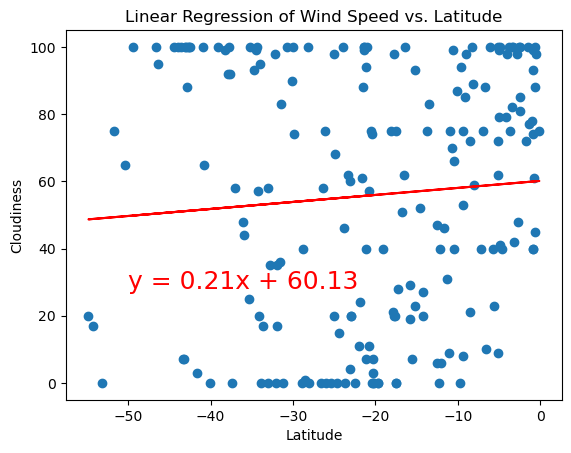

In [31]:
# Southern Hemisphere
cloud_lat_south_hemi_regress = linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],cloud_lat_south_hemi_regress[0]*southern_hemi_df['Lat'] + cloud_lat_south_hemi_regress[1], color='red', label='Linear Regression')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear Regression of Wind Speed vs. Latitude")

print(f"The r-value is: r = {cloud_lat_south_hemi_regress[2]}")
equation6 = f'y = {cloud_lat_south_hemi_regress[0]:.2f}x + {cloud_lat_south_hemi_regress[1]:.2f}'
plt.text(-50, 28, equation6, fontsize=18, color = 'red')

**Discussion about the linear relationship:** 

There seems to be a weak to moderate correlation been cloudiness and latitude. As latitude increases, cloudiness trends upwards. 

### Wind Speed vs. Latitude Linear Regression Plot

 r = 0.002599576103237121


Text(10, 15, 'y = 0.00x + 3.90')

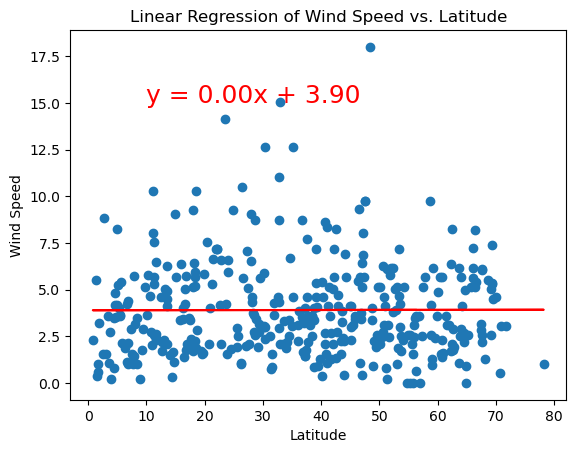

In [32]:
# Northern Hemisphere
wind_lat_north_hemi_regress = linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],wind_lat_north_hemi_regress[0]*northern_hemi_df['Lat'] + wind_lat_north_hemi_regress[1], color='red', label='Linear Regression')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Linear Regression of Wind Speed vs. Latitude")

print(f"The r-value is: r = {wind_lat_north_hemi_regress[2]}")
equation7 = f'y = {wind_lat_north_hemi_regress[0]:.2f}x + {wind_lat_north_hemi_regress[1]:.2f}'
plt.text(10, 15, equation7, fontsize=18, color = 'red')


 r = -0.25196113203652837


Text(-55, 10, 'y = -0.04x + 2.67')

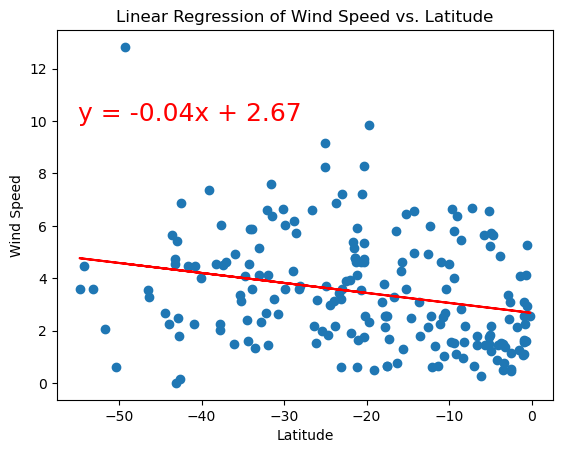

In [36]:
# Southern Hemisphere
wind_lat_south_hemi_regress = linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],wind_lat_south_hemi_regress[0]*southern_hemi_df['Lat'] + wind_lat_south_hemi_regress[1], color='red', label='Linear Regression')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Linear Regression of Wind Speed vs. Latitude")

print(f" r = {wind_lat_south_hemi_regress[2]}")
equation8 = f'y = {wind_lat_south_hemi_regress[0]:.2f}x + {wind_lat_south_hemi_regress[1]:.2f}'
plt.text(-55, 10, equation8, fontsize=18, color = 'red')

**Discussion about the linear relationship:**

Wind speed does not appear to be correlated with latitude. Correlation of coefficients for Northern Hemispshere latitude vs wind speed and Southern Hemispshere latitude vs wind speed both showing little to weak correlation coefficients (r = 0.0026, r =  r = -0.26 rounded to 2 significant figures).  